# Evaluation of the Results for known CPs with fixed window size m (number of values) #
Notebook from https://github.com/ermshaua/time-series-segmentation-benchmark/blob/main/tssb/notebooks/competitor_evaluation.ipynb. Slightly edited.

In [1]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

Let's load the scores from the different methods.

In [2]:
df_scores = pd.read_csv("./segmentation_covering_known_stumpy_m.csv")
df_scores

,dataset,ESPRESSO,BOCD,Window,BinSeg,FLOSS,ClaSP,fluss1,fluss2,fluss3,fluss4,fluss5
0,Adiac,0.421,0.303,0.608,0.948,0.971,0.982,0.970755,0.903707,0.800740,0.873657,0.740361
1,ArrowHead,0.480,0.500,0.913,0.991,0.995,0.996,0.994702,0.980274,0.985497,0.985497,0.977673
2,Beef,0.482,0.804,0.736,0.692,0.935,0.848,0.935417,0.934085,0.768329,0.712773,0.659286
3,BeetleFly,0.541,0.802,0.495,0.652,0.968,1.000,0.967709,0.996880,0.663053,0.665424,0.969223
4,BirdChicken,0.505,0.485,0.925,0.469,0.478,0.480,0.477703,0.973781,0.980656,0.979890,0.480536
5,CBF,0.435,0.619,0.717,0.357,0.940,0.963,0.764311,0.736472,0.498540,0.616636,0.499564
6,Car,0.293,0.256,0.528,0.793,0.764,0.958,0.939744,0.874664,0.686785,0.760479,0.759522
7,Chinatown,1.000,1.000,1.000,1.000,1.000,1.000,1.000000,1.000000,1.000000,1.000000,1.000000
8,ChlorineConcentration,0.555,0.836,0.744,0.530,1.000,1.000,0.999744,0.999744,0.998463,0.581463,0.578676
9,CinCECGTorso,0.474,0.593,0.569,0.645,0.676,0.575,0.675982,0.664521,0.681064,0.612056,0.607689


Let's calculate the mean/median/std error.

In [3]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].mean() * 100, 2)}")

ESPRESSO: mean_error=46.14
BOCD: mean_error=49.36
Window: mean_error=63.87
BinSeg: mean_error=77.51
FLOSS: mean_error=71.79
ClaSP: mean_error=93.07
fluss1: mean_error=71.78
fluss2: mean_error=72.3
fluss3: mean_error=70.55
fluss4: mean_error=66.79
fluss5: mean_error=67.06


In [4]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].median() * 100, 2)}")

ESPRESSO: mean_error=42.1
BOCD: mean_error=49.2
Window: mean_error=59.1
BinSeg: mean_error=79.3
FLOSS: mean_error=72.9
ClaSP: mean_error=98.4
fluss1: mean_error=72.93
fluss2: mean_error=72.29
fluss3: mean_error=67.0
fluss4: mean_error=61.21
fluss5: mean_error=61.64


In [5]:
for name in df_scores.columns[1:]:
    print(f"{name}: std_error={np.round(df_scores[name].std() * 100, 2)}")

ESPRESSO: std_error=22.07
BOCD: std_error=24.13
Window: std_error=17.26
BinSeg: std_error=18.97
FLOSS: std_error=23.93
ClaSP: std_error=11.31
fluss1: std_error=23.93
fluss2: std_error=23.69
fluss3: std_error=22.92
fluss4: std_error=23.52
fluss5: std_error=23.86


Let's compute the wins per method.

In [6]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

/tmp/ipykernel_22224/3065857076.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  ranks = df_scores.rank(1, method = 'min', ascending=False)


In [7]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

ESPRESSO:wins=6 rank=8.8
BOCD:wins=7 rank=8.4
Window:wins=7 rank=6.5
BinSeg:wins=15 rank=4.5
FLOSS:wins=7 rank=4.7
ClaSP:wins=50 rank=1.9
fluss1:wins=11 rank=4.7
fluss2:wins=7 rank=5.0
fluss3:wins=10 rank=5.4
fluss4:wins=7 rank=5.9
fluss5:wins=8 rank=6.2


Let's plot and output the ranks.

In [8]:
# cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
# Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, width=5, reverse=True, textspace=1.2, filename="../ranks.png")

# compute_CD not working with newest Orange version

In [9]:
for name, rank in zip(df_scores.columns[1:], means):
    print(f"{name}: rank={np.round(rank, 5)}")

ESPRESSO: rank=8.81333
BOCD: rank=8.38667
Window: rank=6.52
BinSeg: rank=4.52
FLOSS: rank=4.70667
ClaSP: rank=1.90667
fluss1: rank=4.69333
fluss2: rank=4.98667
fluss3: rank=5.41333
fluss4: rank=5.93333
fluss5: rank=6.16


Let's compute wins/losses against the best-ranking algorithm ClaSP.

In [10]:
for rival in df_scores.columns[1:]:
    if rival == "ClaSP": continue
    
    df_pair = df_scores[["ClaSP", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["ClaSP"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"ClaSP vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

ClaSP vs ESPRESSO: (wins/losses/ties): 1/68/6
ClaSP vs BOCD: (wins/losses/ties): 3/66/6
ClaSP vs Window: (wins/losses/ties): 2/67/6
ClaSP vs BinSeg: (wins/losses/ties): 11/57/7
ClaSP vs FLOSS: (wins/losses/ties): 9/59/7
ClaSP vs fluss1: (wins/losses/ties): 12/59/4
ClaSP vs fluss2: (wins/losses/ties): 9/62/4
ClaSP vs fluss3: (wins/losses/ties): 8/63/4
ClaSP vs fluss4: (wins/losses/ties): 6/65/4
ClaSP vs fluss5: (wins/losses/ties): 7/64/4


Let's compute wins/losses against the stumpy fluss algorithm (no dilation).

In [11]:
for rival in df_scores.columns[1:]:
    if rival == "fluss1": continue
    
    df_pair = df_scores[["fluss1", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["fluss1"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"fluss1 vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

fluss1 vs ESPRESSO: (wins/losses/ties): 11/60/4
fluss1 vs BOCD: (wins/losses/ties): 12/59/4
fluss1 vs Window: (wins/losses/ties): 25/46/4
fluss1 vs BinSeg: (wins/losses/ties): 37/34/4
fluss1 vs FLOSS: (wins/losses/ties): 39/32/4
fluss1 vs ClaSP: (wins/losses/ties): 59/12/4
fluss1 vs fluss2: (wins/losses/ties): 25/40/10
fluss1 vs fluss3: (wins/losses/ties): 24/44/7
fluss1 vs fluss4: (wins/losses/ties): 22/46/7
fluss1 vs fluss5: (wins/losses/ties): 23/45/7


/tmp/ipykernel_22224/3886744767.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/tmp/ipykernel_22224/3886744767.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


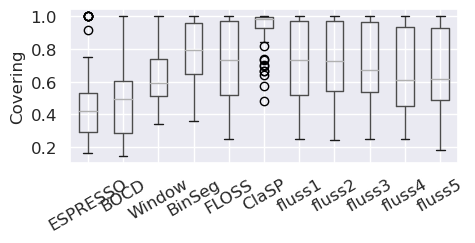

In [12]:
fontsize = 12
_, ax = plt.subplots(figsize=(5,2))

df_scores.boxplot(ax=ax, rot=30)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"./boxplot_known_fixed_m.png", bbox_inches="tight")